# Capstone Project: Covid-19 Crisis

The dataset can be found at https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset . It describes various information about South Korea, coronavirus situation and patients in the first months of pandemic (2020-01-20 - 2020-06-30). Data is divided into 11 csv files each having different information and being well structurised. Dataset has been made using information from government and KCDC of South Korea. South Korea was an example of good management of pandemic. A significant part of its success was detailed information collection of infected people. 

## Goals and Conclusions
In this project I aim to answer these questions:
* Which province has most covid cases brought from abroad and why?
* Is death from corona sudden or a consequence of a long sickness?
* To which age and sex group corona is more mortal?
* Are patients infected by a person, who later deceased, more likely to die of Covid-19 infection?
* Do males or females spread Covid-19 more?
* What places caused the most corona cases?
* Are there less corona cases in the provinces with more universities?
* Is there a relation between searching with corona associated keywords and number of corona cases?

Insights:
* Jeju island has most cases marked as overseas inflow as this province is a popular destination for tourism and holiday. Places like this should have a strict policy for testing and quarantine regarding travelers.
* A death of corona is relatively sudden (median is 6 days after confirmation). People should get tested as soon as they start to feel symptoms to get the best care as fast as possible.
* People older than 50 years are more likely to die of Covid-19 infection than younger patients. Males are more likely to have more severe corona and die than females due to differences between bodies. Estrogen could have a positive impact on the management of the disease (Bandala, 2023. doi:10.2174/1570159X21666230616103850). More research could be done in estrogen impact on corona and new medicine could be created.
* Due to missing data I was not able to answer the question if patients infected by person, who later deceased, are more likely to die of Covid-19 infection.
* Females infects more people than males.
* Churches are the most infectious places. In order to better manage future pandemics, ceremonies at churches should be banned at the very begining of a pandemic as the largest outbreak in South Korea was caused by religious gatherings (https://edition.cnn.com/2020/02/26/asia/shincheonji-south-korea-hnk-intl/index.html).
* There is weak correlation between number of universities and corona cases in the seperate provinces. Safe distance and regular disinfection at universities should be guaranteed.
* As time passed people searched less information about corona but number of new cases increased. In this project a way to predict changes in a number of new corona cases based on NAVER searches was not found.

## Setup

Importing libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict

Setting style for graphs

In [27]:
plt.style.use('ggplot')

Loading data

In [28]:
case = pd.read_csv('Data/Case.csv')
patient = pd.read_csv('Data/PatientInfo.csv')
region = pd.read_csv('Data/Region.csv')
searches = pd.read_csv('Data/SearchTrend.csv')
time = pd.read_csv('Data/Time.csv')
province = pd.read_csv('Data/TimeProvince.csv')
weather = pd.read_csv('Data/Weather.csv')

Creating function for changing data type to datetime64

In [29]:
def convert_time(dataset):
    '''Takes a dataframe, searches for column with term 'date' in its name,
     and changes type of mentioned column to datetime64[s] '''
    for column in dataset:
        if 'date' in column:
            dataset[column] = pd.to_datetime(dataset[column].str.strip()
                                            ).astype("datetime64[s]")

## Data Inspection and Cleaning
In this section all loaded dataframes are described for better understanding what could be expected, checked for missing values and duplicates. In case of no missing values, unique values are inspected to know, if a value was created to mark the missing values (e.g. "-"). If a column named "date" was obtained, types of the dataframe are printed, and in case of wrong date format, "convert_time" is used. The function finds columns containing dates and set their type to datetime64. Types of dataframe are checked again to make sure that they are correct.

In [30]:
print('Basic statistics:\n', case.describe(include='all'))
print('Missing values:\n', case.isna().sum())
print('Number of duplicates:', case.duplicated().sum())
print('Unique values:')
for column in case:
    print(np.sort(case[column].unique())[:5])

Basic statistics:
              case_id province city group infection_case    confirmed latitude  \
count   1.740000e+02      174  174   174            174   174.000000      174   
unique           NaN       17   48     2             81          NaN       66   
top              NaN    Seoul    -  True            etc          NaN        -   
freq             NaN       38   53   124             17          NaN      109   
mean    2.686216e+06      NaN  NaN   NaN            NaN    65.488506      NaN   
std     1.943218e+06      NaN  NaN   NaN            NaN   355.097654      NaN   
min     1.000001e+06      NaN  NaN   NaN            NaN     0.000000      NaN   
25%     1.100006e+06      NaN  NaN   NaN            NaN     4.000000      NaN   
50%     1.700004e+06      NaN  NaN   NaN            NaN    10.000000      NaN   
75%     4.100004e+06      NaN  NaN   NaN            NaN    31.750000      NaN   
max     7.000004e+06      NaN  NaN   NaN            NaN  4511.000000      NaN   

       l

In [31]:
print('Basic statistics:\n', patient.describe(include='all'))
print('Missing values:\n', patient.isna().sum())
print('Number of duplicates:', patient.duplicated().sum())
print('Types of columns:\n', patient.dtypes)
convert_time(patient)
print('Types of columns after changing date type:\n', patient.dtypes)

Basic statistics:
           patient_id     sex   age country province          city  \
count   5.165000e+03    4043  3785    5165     5165          5071   
unique           NaN       2    11      16       17           163   
top              NaN  female   20s   Korea    Seoul  Gyeongsan-si   
freq             NaN    2218   899    5123     1312           639   
mean    2.863635e+09     NaN   NaN     NaN      NaN           NaN   
std     2.074211e+09     NaN   NaN     NaN      NaN           NaN   
min     1.000000e+09     NaN   NaN     NaN      NaN           NaN   
25%     1.000001e+09     NaN   NaN     NaN      NaN           NaN   
50%     2.000000e+09     NaN   NaN     NaN      NaN           NaN   
75%     6.001000e+09     NaN   NaN     NaN      NaN           NaN   
max     7.000000e+09     NaN   NaN     NaN      NaN           NaN   

              infection_case infected_by contact_number symptom_onset_date  \
count                   4246        1346            791                690

In [32]:
print('Basic statistics:\n', region.describe(include='all'))
print('Missing values:\n', region.isna().sum())
print('Number of duplicates:', region.duplicated().sum())
print('Unique values:')
for column in region:
    print(np.sort(region[column].unique())[:5])

Basic statistics:
                 code     province     city    latitude   longitude  \
count     244.000000          244      244  244.000000  244.000000   
unique           NaN           18      222         NaN         NaN   
top              NaN  Gyeonggi-do  Dong-gu         NaN         NaN   
freq             NaN           32        6         NaN         NaN   
mean    32912.090164          NaN      NaN   36.396996  127.661401   
std     19373.349736          NaN      NaN    1.060304    0.904781   
min     10000.000000          NaN      NaN   33.488936  126.263554   
25%     14027.500000          NaN      NaN   35.405263  126.927663   
50%     30075.000000          NaN      NaN   36.386601  127.384249   
75%     51062.500000          NaN      NaN   37.466119  128.473953   
max     80000.000000          NaN      NaN   38.380571  130.905883   

        elementary_school_count  kindergarten_count  university_count  \
count                244.000000          244.000000        244.0000

In [33]:
print('Basic statistics:\n', searches.describe(include='all'))
print('Missing values:\n', searches.isna().sum())
print('Number of duplicates:', searches.duplicated().sum())
print('Unique values:')
for column in searches:
    print(np.sort(searches[column].unique())[:5])
print('Types of columns:\n', searches.dtypes)
convert_time(searches)
print('Types of columns after changing date type:\n', searches.dtypes)

Basic statistics:
               date         cold          flu    pneumonia  coronavirus
count         1642  1642.000000  1642.000000  1642.000000  1642.000000
unique        1642          NaN          NaN          NaN          NaN
top     2016-01-01          NaN          NaN          NaN          NaN
freq             1          NaN          NaN          NaN          NaN
mean           NaN     0.190506     0.244946     0.221430     1.862522
std            NaN     0.459556     0.762229     0.463014     9.042341
min            NaN     0.051630     0.009810     0.068810     0.001540
25%            NaN     0.106630     0.042105     0.128630     0.006270
50%            NaN     0.133170     0.097855     0.164445     0.008900
75%            NaN     0.165900     0.250035     0.209765     0.013158
max            NaN    15.720710    27.327270    11.393200   100.000000
Missing values:
 date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64
Number of dupl

In [34]:
print('Basic statistics:\n', time.describe(include='all'))
print('Missing values:\n', time.isna().sum())
print('Number of duplicates:', time.duplicated().sum())
print('Unique values:')
for column in time:
    print(np.sort(time[column].unique())[:5])
print('Types of columns:\n', time.dtypes)
convert_time(time)
print('Types of columns after changing date type:\n', time.dtypes)

Basic statistics:
               date        time          test      negative     confirmed  \
count          163  163.000000  1.630000e+02  1.630000e+02    163.000000   
unique         163         NaN           NaN           NaN           NaN   
top     2020-01-20         NaN           NaN           NaN           NaN   
freq             1         NaN           NaN           NaN           NaN   
mean           NaN    4.122699  4.977797e+05  4.754839e+05   7834.865031   
std            NaN    7.019174  3.958830e+05  3.865611e+05   4666.040541   
min            NaN    0.000000  1.000000e+00  0.000000e+00      1.000000   
25%            NaN    0.000000  9.648800e+04  5.877400e+04   3443.000000   
50%            NaN    0.000000  5.030510e+05  4.773030e+05  10450.000000   
75%            NaN   16.000000  7.825585e+05  7.542225e+05  11116.000000   
max            NaN   16.000000  1.273766e+06  1.240157e+06  12800.000000   

            released    deceased  
count     163.000000  163.000000 

In [35]:
print('Basic statistics:\n', province.describe(include='all'))
print('Missing values:\n', province.isna().sum())
print('Number of duplicates:', province.duplicated().sum())
print('Unique values:')
for column in province:
    print(np.sort(province[column].unique()[:5]))
print('Types of columns:\n', province.dtypes)
convert_time(province)
print('Types of columns after changing date type:\n', province.dtypes)

Basic statistics:
               date         time province    confirmed     released  \
count         2771  2771.000000     2771  2771.000000  2771.000000   
unique         163          NaN       17          NaN          NaN   
top     2020-01-20          NaN    Seoul          NaN          NaN   
freq            17          NaN      163          NaN          NaN   
mean           NaN     4.122699      NaN   444.308192   320.726453   
std            NaN     6.998873      NaN  1360.890963  1126.041255   
min            NaN     0.000000      NaN     0.000000     0.000000   
25%            NaN     0.000000      NaN     9.000000     1.000000   
50%            NaN     0.000000      NaN    42.000000    21.000000   
75%            NaN    16.000000      NaN   133.000000    92.000000   
max            NaN    16.000000      NaN  6906.000000  6700.000000   

           deceased  
count   2771.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       9.239986  
std     

In [36]:
print('Basic statistics:\n', weather.describe(include='all'))
print('Missing values:\n', weather.isna().sum())
print('Number of duplicates:', weather.duplicated().sum())
print('Types of columns:\n', weather.dtypes)
convert_time(weather)
print('Types of columns after changing date type:\n', weather.dtypes)

Basic statistics:
                 code province        date      avg_temp      min_temp  \
count   26271.000000    26271       26271  26256.000000  26266.000000   
unique           NaN       17        1642           NaN           NaN   
top              NaN    Seoul  2016-01-01           NaN           NaN   
freq             NaN     1642          16           NaN           NaN   
mean    32124.662175      NaN         NaN     13.859423      9.665396   
std     20313.487872      NaN         NaN      9.520334      9.896768   
min     10000.000000      NaN         NaN    -14.800000    -19.200000   
25%     13500.000000      NaN         NaN      6.000000      1.400000   
50%     20000.000000      NaN         NaN     14.600000      9.900000   
75%     50500.000000      NaN         NaN     21.900000     18.200000   
max     70000.000000      NaN         NaN     33.900000     30.300000   

            max_temp  precipitation  max_wind_speed  most_wind_direction  \
count   26268.000000   26271

## Exploratory Data Analysis

### Cases From Abroad

The analysis will start by answering the first question: "Which province has most covid cases brought from abroad and why?". My hypothesis is that in popular holiday destinations or provinces with more tourist attractions corona cases from abroad will take a bigger part. 

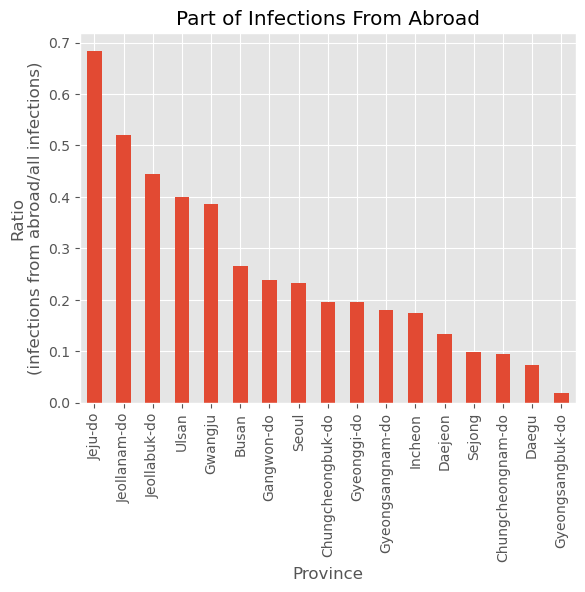

In [37]:
from_abroad = patient[patient.infection_case == 'overseas inflow']
from_abroad_ratio = (
    from_abroad.province.value_counts()/patient.province.value_counts()
    ).sort_values(ascending=False)
from_abroad_ratio.plot.bar()
plt.title('Part of Infections From Abroad')
plt.xlabel('Province')
plt.ylabel('Ratio\n(infections from abroad/all infections)');

In the province of Jeju, infection cases are mostly from abroad. After a brief researching it is clear that island of Jeju is a popular holiday destination among Koreans and Japanese, is recognised as one of the top honeymoon destinations in the world, and is an object of UNESCO, which attracts even more tourists.

Another province in which more than a half of all corona cases are from abroad in Jeollanam-do. Jeolllanam-do is another holiday destination, yet not as popular as Jeju island.

It seems that in holiday destinations the biggest issue is Covid-19 infected tourists as they make the most infection cases.

### Deaths of Covid-19

Next, I would like to find out more about deaths connected to Covid-19. Is death sudden or a consequence of a long sickness?

In [38]:
deceased = patient[patient.state == 'deceased']
deceased_dates = deceased[['confirmed_date', 'deceased_date']].dropna()
diagnosis_to_death = (
    deceased_dates.deceased_date - deceased_dates.confirmed_date).dt.days
diagnosis_to_death = diagnosis_to_death[diagnosis_to_death >= 0]
print('Days sick until death', diagnosis_to_death.describe(), sep='\n')
released_dates = patient[patient.state == 'released'][[
    'confirmed_date', 'released_date']].dropna()
diagnosis_to_home = (
    released_dates.released_date - released_dates.confirmed_date).dt.days
print('Days sick until discharged', diagnosis_to_home[
    diagnosis_to_home >= 0].describe(), sep='\n')

Days sick until death
count    64.000000
mean     11.234375
std      14.473558
min       0.000000
25%       2.750000
50%       6.000000
75%      12.250000
max      67.000000
dtype: float64
Days sick until discharged
count    1579.000000
mean       24.725142
std        13.019210
min         0.000000
25%        16.000000
50%        23.000000
75%        31.000000
max       114.000000
dtype: float64


It appears that death caused by Covid-19 virus is relatively faster (with median of 6 days) than recovery (with mean of 25 days and median of 23 days). However, it is not a guarantee that after a long sickness a patient will definitely recover as there was a case of death after 67 days of corona confirmation. 

The next question is if certain age and sex groups are more likely to die of corona. In order to find that out a bar chart was made and all corona cases in the groups were counted.

age
20s     899
50s     667
30s     523
40s     518
60s     482
70s     232
10s     178
80s     170
0s       66
90s      49
100s      1
Name: count, dtype: int64


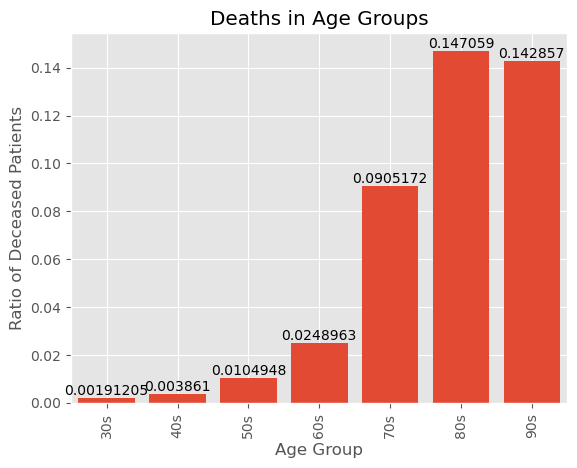

In [39]:
print(patient.age.value_counts())

age_death = deceased.age.value_counts() / patient.age.value_counts()
age_death.dropna(inplace=True)
age_death.plot.bar()
plt.title('Deaths in Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Ratio of Deceased Patients')
ax = plt.gca()
ax.bar_label(ax.bar(age_death.keys(), age_death));

It seems that mortality increases with age. Which is not surprising as older bodies are weaker.

Ratio of deaths by sex:
 sex
female    0.012624
male      0.025753
Name: count, dtype: float64


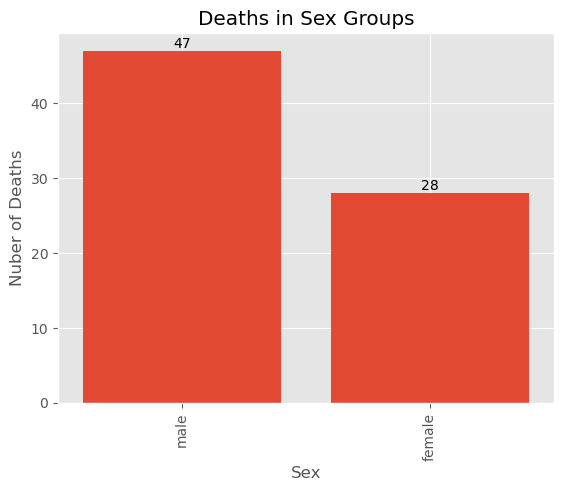

In [40]:
sex_death = deceased.sex.value_counts()
print('Ratio of deaths by sex:\n', sex_death / patient.sex.value_counts())
sex_death.plot.bar()
plt.title('Deaths in Sex Groups')
plt.xlabel('Sex')
plt.ylabel('Nuber of Deaths')
ax = plt.gca()
ax.bar_label(ax.bar(sex_death.keys(), sex_death));

Also, males are more likely to die. This tendency was also discovered in other researches (Fabiao, 2022. doi: 10.1590/1414-431X2021e11711). It appears that biological differences between male and female bodies cause females to recover and survive corona better.

I had an idea to find out is a patient more likely to die if a person who infected the patient deceased. If this would be a case, other hypotheses could be raised.

In [41]:
dcount = 0
acount = 0
for index, row in deceased.dropna(subset='infected_by').iterrows():
    infector = row['infected_by']
    print('ID of infector: ', infector)
    for fate in patient[patient.patient_id == int(infector)].state:
        if fate == 'deceased':
            dcount += 1
        else:
            acount += 1
            
print('Number of patients deceased (infector also deceased): ', dcount,
      '\nNumber of patients deceased (infector still alive): ', acount)

ID of infector:  1000000017
ID of infector:  1000000443
ID of infector:  6016000015
Number of patients deceased (infector also deceased):  0 
Number of patients deceased (infector still alive):  3


However, in this case dataset could not help because there were too many missing values and only 3 infectors of deceased patients were known. So this question remained unanswered.

### Spread of Covid-19

Next, I would like to answer the question if males or females spread Covid-19 more.

In [42]:
patient_part = patient[['patient_id', 'sex', 'infected_by']].dropna(
    subset='sex')
mcount = 0
fcount = 0
minfected = 0
finfected = 0
patient_part_group = patient_part.groupby('infected_by')[
    'infected_by'].value_counts()
for infector, infected in patient_part_group.items():
    if len(str(infector)) < 11:
        for sex in patient_part[patient_part.patient_id == int(infector)].sex:
            if sex == 'male':
                mcount += 1
                minfected += infected
            else:
                fcount += 1
                finfected += infected

covid_mvp = int(patient_part_group.nlargest(1).keys()[0])
print('Patient who infected the most people:\n', patient[
    patient.patient_id == covid_mvp][[
    'patient_id','sex', 'age', 'contact_number']],
     '\nThis patient infected',  patient_part_group.nlargest(1)[0], 'people.')
print('Number of males who infected others:', mcount, 
      '\nNumber of people males infected:', minfected, 
      '\nNumber of females who infected others:', fcount,
      '\nNumber of people females infected:',finfected)
print('On average 1 male infects', round(minfected/mcount, 2), 'people.',
      '\nOn average 1 female infects', round(finfected/fcount, 2), 'people.')
print('On average 1 person infects', round(patient_part_group.mean(), 2),
      'people.')

Patient who infected the most people:
       patient_id     sex  age contact_number
2417  2000000205  female  70s              8 
This patient infected 51 people.
Number of males who infected others: 228 
Number of people males infected: 430 
Number of females who infected others: 263 
Number of people females infected: 653
On average 1 male infects 1.89 people. 
On average 1 female infects 2.48 people.
On average 1 person infects 2.17 people.


C:\Users\aa2is\AppData\Local\Temp\ipykernel_24368\2075300829.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '\nThis patient infected',  patient_part_group.nlargest(1)[0], 'people.')


It can be concluded that females pass virus to more people. I found interesting that patient 2000000205 had only 8 contacts but infected 51 people.

On the topic of virus spread, I want to find out which enviroments are the most infectious. To do that, I found keywords in the names of infection cases and counted them. I've chosen the groups based on the largest infection clusters as some stood out as most frequent, e.g. churches or hospitals.

50 largest infection clusters:
                             infection_case  confirmed
48                      Shincheonji Church       4511
145                     Shincheonji Church        566
49                   Second Mi-Ju Hospital        196
0                            Itaewon Clubs        139
50         Hansarang Convalescent Hospital        124
1                                  Richway        119
146               Cheongdo Daenam Hospital        119
127                gym facility in Cheonan        103
51            Daesil Convalescent Hospital        101
2                      Guro-gu Call Center         95
147            Bonghwa Pureun Nursing Home         68
90         River of Grace Community Church         67
91                Coupang Logistics Center         67
148          Gyeongsan Seorin Nursing Home         66
92                           Itaewon Clubs         59
93                                 Richway         58
70           Door-to-door sales in Daejeon        

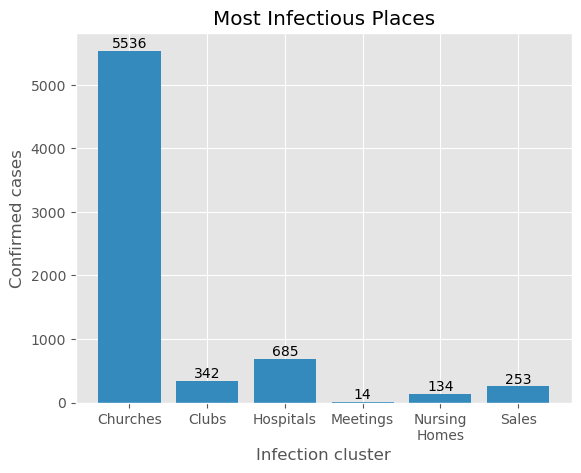

In [43]:
print('50 largest infection clusters:\n', case[case.group == True
      ].nlargest(60, columns='confirmed')[['infection_case', 'confirmed']])
      
counter = defaultdict(int)
for i in case.index:
    if re.search(".ospital.*", case.infection_case[i]):
        counter['Hospitals'] += case.confirmed[i]
    elif re.search(".urch.*", case.infection_case[i]):
        counter['Churches'] += case.confirmed[i]
    elif re.search(".eeting.*|.athering.*", case.infection_case[i]):
        counter['Meetings'] += case.confirmed[i]
    elif re.search(".ursing.*", case.infection_case[i]):
        counter['Nursing\nHomes'] += case.confirmed[i]
    elif re.search(".lub.*", case.infection_case[i]):
        counter['Clubs'] += case.confirmed[i]
    elif re.search(".ale.*|.ichway", case.infection_case[i]):
        counter['Sales'] += case.confirmed[i]

counter = dict(sorted(counter.items()))
plt.bar(*zip(*counter.items()))
plt.title('Most Infectious Places')
plt.xlabel('Infection cluster')
plt.ylabel('Confirmed cases')
ax = plt.gca()
ax.bar_label(ax.bar(counter.keys(), counter.values()));

In group infections various churches (especially Shincheonji Church) are the main reason of outbreaks. Other environments, where groups of people get infected include hospitals, clubs, nursing homes, gatherings and sales (door-to-door and seminars).

### Predicting Changes in a Number of Corona Cases

I wanted to check if there are less corona cases in the provinces with more universities. The idea behind it is that in provinces with more universities population might be better educated and would better protect themselves and others from catching a virus.

Correlation between number of universities and corona cases: 0.01


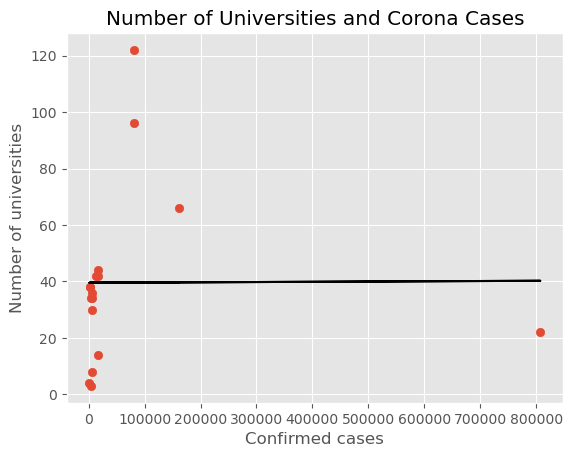

In [44]:
province_group = province.groupby('province')['confirmed'].sum()
uni_count = region[region.province != 'Korea'
                   ].groupby('province')['university_count'].sum()
print('Correlation between number of universities and corona cases:',
      round(province_group.corr(uni_count), 2))
plt.scatter(province_group, uni_count)
plt.title('Number of Universities and Corona Cases')
plt.xlabel('Confirmed cases')
plt.ylabel('Number of universities')
p = np.poly1d(np.polyfit(province_group, uni_count, 1))
plt.plot(province_group, p(province_group), 'k-');

At first sight, it seems that there is no correlation. However, at least one value might be an outlier as it is distant from other values. My next step is to identify all outliers and repeat analysis without them.

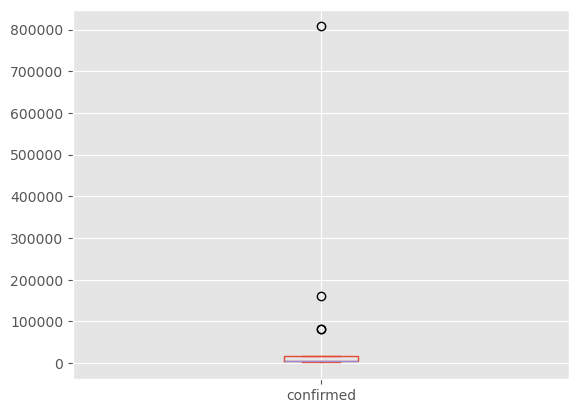

In [45]:
province_group.plot.box()
uni_cases = pd.merge(province_group, uni_count,
                     left_index=True, right_index=True)
Q3 = uni_cases.confirmed.quantile(0.75)
IQR = Q3 - uni_cases.confirmed.quantile(0.25)
uni_cases = uni_cases[uni_cases.confirmed < (Q3 + 1.5*IQR)]

Correlation between number of universities and corona cases: 0.29


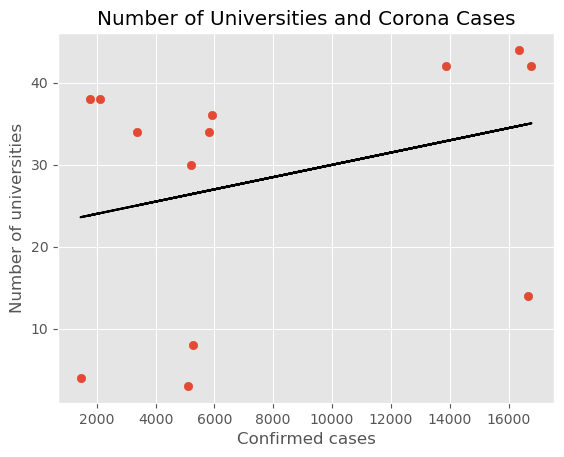

In [46]:
print('Correlation between number of universities and corona cases:',
      round(uni_cases.confirmed.corr(uni_cases.university_count), 2))
plt.scatter('confirmed', 'university_count', data=uni_cases)
plt.title('Number of Universities and Corona Cases')
plt.xlabel('Confirmed cases')
plt.ylabel('Number of universities')
p = np.poly1d(np.polyfit(uni_cases.confirmed, uni_cases.university_count, 1))
plt.plot(uni_cases.confirmed, p(uni_cases.confirmed), 'k-');

After removing outliers, weak correlation between number of univerisities and number of corona cases was observed. However, positive correlation was not what I expected. My thoughts about it is that young people who attend universities socialise more e.g. have gatherings, live in dorms with other students, meet in classes. Due to more active communication with others, Covid-19 was spread faster.

My suggestion would be to limit in person lectures and guarantee safe distance at workshops as soon as pandemic starts. As it might be not possible to close dorms, shared spaces should be cleaned and disinfected regularly.

However, no correlation between weather and changes in number of infections was found in this project. Even though significance of weather was shown in other research (Ganslmeier, 2021. doi:10.1038/s41598-021-01189-3).

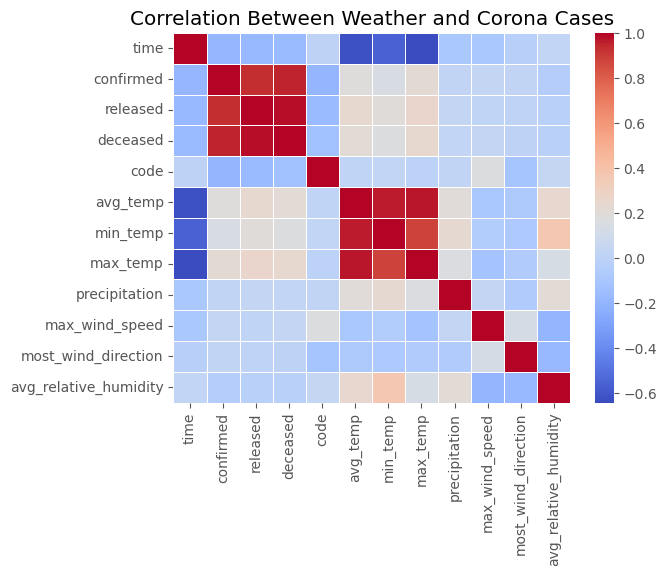

In [47]:
weather_covid = weather[weather.date >= '2020-01-20']
weather_province = province.merge(weather_covid, on=['date', 'province'])
weather_province.select_dtypes('number').corr()
sns.heatmap(weather_province.select_dtypes('number').corr(), cmap="coolwarm",
            lw=0.6)
plt.title('Correlation Between Weather and Corona Cases');

Finally, I wanted to know if it is possible to predict changes in the number of confirmed corona cases based on NAVER searches. For that purpose I looked at correlations between searching specific keywords, cases number and time.

,date,confirmed,deceased,cold,flu,pneumonia,coronavirus
date,1.000000,0.905860,0.955546,-0.567687,-0.696863,-0.624410,-0.730675
confirmed,0.905860,1.000000,0.938122,-0.587739,-0.751516,-0.679876,-0.809950
deceased,0.955546,0.938122,1.000000,-0.633644,-0.672313,-0.593277,-0.789967
cold,-0.567687,-0.587739,-0.633644,1.000000,0.441977,0.364537,0.659760
flu,-0.696863,-0.751516,-0.672313,0.441977,1.000000,0.867869,0.658271
pneumonia,-0.624410,-0.679876,-0.593277,0.364537,0.867869,1.000000,0.643193
coronavirus,-0.730675,-0.809950,-0.789967,0.659760,0.658271,0.643193,1.000000


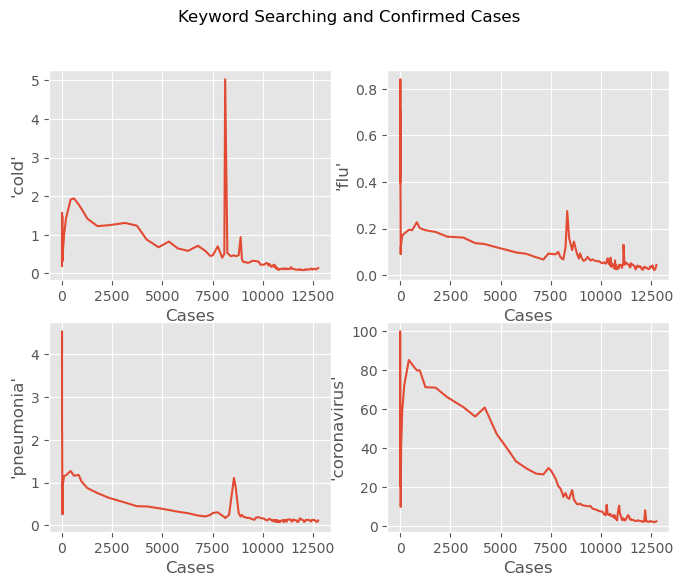

In [48]:
searches_covid = searches[searches.date >= '2020-01-20']
searches_time = time.merge(searches, on='date')
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot('confirmed','cold', data=searches_time)
plt.xlabel('Cases')
plt.ylabel("'cold'")
plt.subplot(2, 2, 2)
plt.plot('confirmed', 'flu', data=searches_time)
plt.xlabel('Cases')
plt.ylabel("'flu'")
plt.subplot(2, 2, 3)
plt.plot('confirmed', 'pneumonia', data=searches_time)
plt.xlabel('Cases')
plt.ylabel("'pneumonia'")
plt.subplot(2, 2, 4)
plt.plot('confirmed', 'coronavirus', data=searches_time)
plt.xlabel('Cases')
plt.ylabel("'coronavirus'")
plt.suptitle('Keyword Searching and Confirmed Cases')
searches_time[['date', 'confirmed', 'deceased', 'cold', 'flu', 'pneumonia',
               'coronavirus']].corr()


After checking correlation and line plots it seems that there is a negative correlation between searches and cases. However, it is not what I expected and my next step is to check how searches change over time.

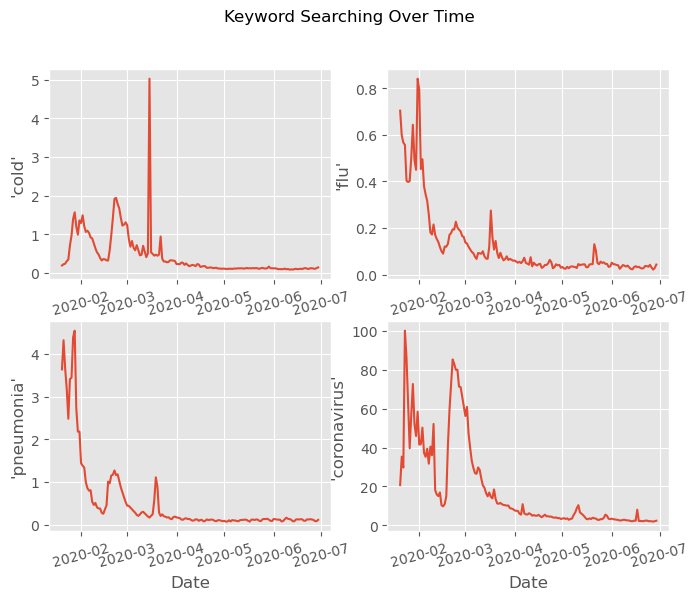

In [49]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot('date', 'cold', data=searches_time)
plt.xlabel('Date')
plt.ylabel("'cold'")
plt.xticks(rotation=15)
plt.subplot(2, 2, 2)
plt.plot('date', 'flu', data=searches_time)
plt.xlabel('Date')
plt.ylabel("'flu'")
plt.xticks(rotation=15)
plt.subplot(2, 2, 3)
plt.plot('date', 'pneumonia', data=searches_time)
plt.xlabel('Date')
plt.ylabel("'pneumonia'")
plt.xticks(rotation=15)
plt.subplot(2, 2, 4)
plt.plot('date', 'coronavirus', data=searches_time)
plt.xlabel('Date')
plt.ylabel("'coronavirus'")
plt.xticks(rotation=15);
plt.suptitle('Keyword Searching Over Time');

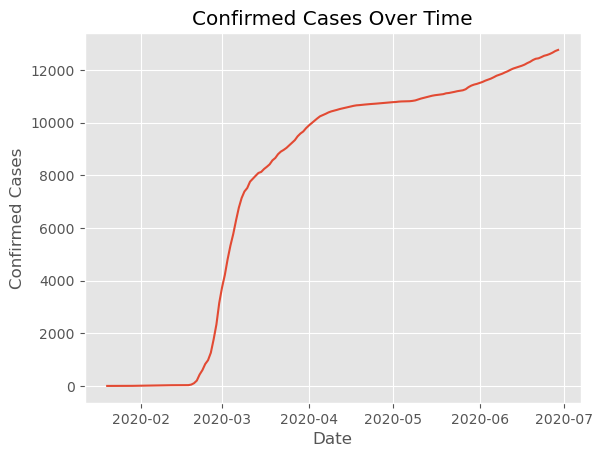

In [50]:
plt.plot('date', 'confirmed', data=searches_time)
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases');

With time, daily number of new corona cases increased while NAVER searches of Covid-19 related information decreased as people became more familiar with the virus and disease. Negative correlation between searches and cases was related to time.

## Conclusions and Insights

* Jeju island has most cases marked as overseas inflow as this province is a popular destination for tourism and holiday. Places like this should have a strict policy for testing and quarantine regarding travelers.
* A death of corona is relatively sudden (median is 6 days after confirmation). People should get tested as soon as they start to feel symptoms to get the best care as fast as possible.
* People older than 50 years are more likely to die of Covid-19 infection than younger patients. Males are more likely to have more severe corona and die than females due to differences between bodies. Estrogen could have a positive impact on the management of the disease (Bandala, 2023. doi:10.2174/1570159X21666230616103850). More research could be done in estrogen impact on corona and new medicine could be created.
* Due to missing data I was not able to answer the question if patients infected by person, who later deceased, are more likely to die of Covid-19 infection.
* Females infects more people than males.
* Churches are the most infectious places. In order to better manage future pandemics, ceremonies at churches should be banned at the very begining of a pandemic as the largest outbreak in South Korea was caused by religious gatherings (https://edition.cnn.com/2020/02/26/asia/shincheonji-south-korea-hnk-intl/index.html).
* There is weak correlation between number of universities and corona cases in the seperate provinces. Safe distance and regular disinfection at universities should be guaranteed.
* As time passed people searched less information about corona but number of new cases increased. In this project a way to predict changes in a number of new corona cases based on NAVER searches was not found.

## Next Steps and Improvement

Statistical significances could be calculated for all of conclusions but it was not done since the goal of doing this project is to demonstrate knowledge of Python and EDA, not  statistics. Also, if information from other countries would be gathered, insights for worldwide control of pandemic could be provided.